# Dimensionality Reduction by Extracting Principal

[Wine](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

In [2]:
df = pd.read_csv('wine.data')
df.shape

(177, 14)

In [3]:
df.columns=('class','Alcohol','Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids',
            'Nonflavanoid phenols','Proanthocyanins',
            'Color intensity','Hue',
            'OD280/OD315 of diluted wines','Proline')            

In [4]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [5]:
X = df.iloc[:,1:]

In [6]:
y = df['class']

In [7]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42) 

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [9]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
#X_train_sc = sc.fit_transform(X_train)
#X_test_sc = sc.fit_transform(X_test)<.... this is wrong approach since we dont 
#know what is our testset actually

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)
pca.fit(X_test_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca.components_

array([[ 0.23095574, -0.15647394, -0.00325308, -0.25393989,  0.17057935,
         0.41251867,  0.42601492, -0.34804177,  0.34920495, -0.03572964,
         0.23346377,  0.30184381,  0.29487765],
       [-0.4680026 , -0.15134131, -0.39986405, -0.03987384, -0.23887281,
        -0.06228236,  0.04912696, -0.01735155,  0.14204558, -0.50108588,
         0.35888808,  0.18062475, -0.31661394]])

In [13]:
pca.explained_variance_ratio_

array([0.37992185, 0.17812018])

In [14]:
print(np.round(pca.explained_variance_ratio_,3))

[0.38  0.178]


In [15]:
pd.DataFrame(np.round(pca.components_,3),columns = X.columns).T

,0,1
Alcohol,0.231,-0.468
Malic acid,-0.156,-0.151
Ash,-0.003,-0.400
Alcalinity of ash,-0.254,-0.040
Magnesium,0.171,-0.239
Total phenols,0.413,-0.062
Flavanoids,0.426,0.049
Nonflavanoid phenols,-0.348,-0.017
Proanthocyanins,0.349,0.142
Color intensity,-0.036,-0.501


No preceived idea of the number of PCAs we want

In [16]:
pca = PCA(n_components=None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.fit_transform(X_train_sc)

array([[ 1.70830213e+00, -1.22139548e+00,  8.78567656e-01, ...,
         2.90766610e-01, -4.92366821e-01,  2.18131021e-01],
       [ 1.62478154e+00, -1.73047079e+00,  1.02951739e+00, ...,
        -5.87020782e-02,  7.12978054e-01,  3.31656659e-01],
       [-5.13552834e-01, -8.17724237e-01,  1.83670109e+00, ...,
        -2.48644282e-01, -2.49725417e-01,  2.25525204e-02],
       ...,
       [-2.26079414e+00,  1.94247426e+00,  2.85691692e-04, ...,
         1.86636291e-01,  3.37540503e-01, -8.86370613e-02],
       [-9.61525175e-01, -2.15336292e+00,  2.19257786e-01, ...,
        -7.90533815e-01,  2.65918038e-01, -3.65410340e-01],
       [ 3.96601810e-01, -2.73429743e+00, -6.50415220e-01, ...,
         3.00640923e-01, -6.72878062e-01, -1.12810887e-01]])

In [18]:
print(np.round(pca.explained_variance_ratio_,3))

[0.358 0.197 0.121 0.07  0.062 0.047 0.037 0.027 0.024 0.019 0.016 0.012
 0.009]


In [19]:
np.cumsum(np.round(pca.explained_variance_ratio_,3))

array([0.358, 0.555, 0.676, 0.746, 0.808, 0.855, 0.892, 0.919, 0.943,
       0.962, 0.978, 0.99 , 0.999])

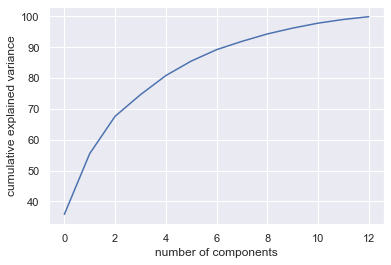

In [20]:
plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_,3))*100)
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.show()

***

In [21]:
res = pca.transform(X_train_sc)
ind_nam=["PCA_"+str(k) for k in range(0,len(res))]

In [31]:
df2 = pd.DataFrame(res, columns=df.columns[1:],
                  index=ind_nam)[0:4]
df2.T.sort_values(by='PCA_0')
df2.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
PCA_0,1.708302,-1.221395,0.878568,-1.308982,0.532898,-0.759541,1.162437,0.380202,0.409936,-0.176970,0.290767,-0.492367,0.218131
PCA_1,1.624782,-1.730471,1.029517,-1.144530,-0.705338,1.000235,1.160605,-0.363778,-0.642378,1.133351,-0.058702,0.712978,0.331657
PCA_2,-0.513553,-0.817724,1.836701,-0.732042,0.199354,-0.183873,1.386961,-0.503835,-0.997790,-0.910062,-0.248644,-0.249725,0.022553
PCA_3,-1.197878,0.258056,-0.172600,0.314064,-0.895537,-0.443756,-0.239502,0.341758,0.783672,-0.201894,0.113264,-0.428351,0.164182


In [ ]:
//roh

In [90]:
import pandas as pd
import numpy as np

df = pd.read_csv('tempal2.txt', sep=" ",header=None)
df.columns=('jan','f','ma',"ap","ma","jun","jul","aug","sep","oct","nov","dec","la")
df_min=pd.read_csv('min_temp.txt', sep=" ",header=None)
df_min.columns=('jan','f','ma',"ap","ma","jun","jul","aug","sep","oct","nov","dec","la")



In [91]:
df_w=pd.read_csv('wind_sp.txt', sep=" ",header=None)
df_w.columns=('jan','f','ma',"ap","ma","jun","jul","aug","sep","oct","nov","dec")
df_w;

In [92]:
hum=pd.read_csv('humid.txt', sep=" ",header=None)
hum.columns=('jan','f','ma',"ap","ma","jun","jul","aug","sep","oct","nov","dec")
hum;

,jan,f,ma,ap,ma,jun,jul,aug,sep,oct,nov,dec
0,78,69,67,58,68,77,84,84,82,77,72,77
1,79,70,53,58,59,71,83,83,81,76,72,76
2,68,63,62,52,58,65,72,80,79,79,71,65
3,74,64,46,38,44,60,80,83,80,72,69,72
4,83,73,59,60,69,80,85,83,82,78,77,83
5,76,67,47,39,46,63,82,84,82,77,73,75
6,81,77,66,53,58,71,81,86,85,83,79,8
7,81,73,60,56,67,76,84,83,82,77,73,7
8,84,72,59,57,67,77,86,84,84,77,74,80
9,78,69,53,48,59,70,83,83,82,76,73,77


In [110]:
cloud=pd.read_csv('cloud.txt', sep=" ",header=None)
cloud.columns=('jan','f','ma',"ap","ma","jun","jul","aug","sep","oct","nov","dec")
cloud;

In [118]:
rain_mi=pd.read_csv('rain_min.txt', sep=" ",header=None)
rain_mi.columns=('jan','f','ma',"ap","ma","jun","jul","aug","sep","oct","nov","dec")
rain_mi;

In [123]:
rainy_day=pd.read_csv('rainy_day.txt', sep=" ",header=None)
rainy_day.columns=('jan','f','ma',"ap","ma","jun","jul","aug","sep","oct","nov","dec")
rainy_day;

,jan,f,ma,ap,ma,jun,jul,aug,sep,oct,nov,dec
0,0.9,0.9,0.8,1.3,3.5,8.2,13.8,12.4,9.8,3.2,0.3,0.5
1,1.2,0.9,0.7,0.7,1.9,6.0,12.8,12.2,9.0,2.6,0.3,0.6
2,0.8,0.7,0.7,1.4,3.2,6.6,12.5,10.6,8.1,2.2,0.3,0.5
3,1.6,1.4,1.1,0.9,1.7,6.1,14.9,14.0,9.5,2.8,0.4,0.6
4,0.7,0.6,0.8,2.2,5.5,10.0,16.2,13.3,10.7,3.0,0.3,0.6
5,0.9,0.9,0.7,0.4,1.2,5.9,12.4,12.2,8.8,2.1,0.5,0.7
6,0.9,0.7,0.6,0.8,2.2,7.3,13.8,12.6,10.2,2.9,0.4,0.4
7,1.4,1.1,1.0,0.8,3.0,8.5,13.8,11.6,8.8,2.2,0.3,0.1
8,0.9,0.9,0.6,1.1,3.1,6.4,12.8,11.5,8.7,2.2,0.5,0.4
9,1.0,0.8,0.7,0.7,1.6,5.3,12.6,10.9,8.6,2.2,0.3,0.4


In [94]:
df=df[['jan','f','ma',"ap","ma","jun","jul","aug","sep","oct","nov","dec"]]
df;

In [117]:
df_min=df_min[['jan','f','ma',"ap","ma","jun","jul","aug","sep","oct","nov","dec"]]
df_min;

In [124]:
column_names = ["max_temp(c)", "min_temp(c)", "mean_windspeed(km/hr)","re_hum(%)","cloud(okta)",
                "Mean_rain(mm)","avg._no._rainyday","district"]
z = pd.DataFrame(columns = column_names)
z["max_temp(c)"]=df1['jan']
z["min_temp(c)"]=df_min['jan']
z["mean_windspeed(km/hr)"]=df_w['jan']
z["re_hum(%)"]=hum['jan']
z["cloud(okta)"]=cloud["jan"]
z["district"]=["Bhagalpur","chapra","Darbhanga","Dehri","Forbesganj","Gaya","jamui","Motihari","Muzaffarpur","patna","Purnea","Raxaul","Sabour","Supaul"]
z["Mean_rain(mm)"]=rain_mi['jan'];
z["avg._no._rainyday"]=rainy_day["jan"]
z

,max_temp(c),min_temp(c),mean_windspeed(km/hr),re_hum(%),cloud(okta),Mean_rain(mm),avg._no._rainyday,district
0,24.6,11.9,4.0,78,1.6,13.4,0.9,Bhagalpur
1,22.9,10.5,2.8,79,1.1,17.0,1.2,chapra
2,23.2,9.3,1.5,68,0.8,10.9,0.8,Darbhanga
3,23.8,8.6,3.0,74,1.4,12.2,1.6,Dehri
4,23.5,9.4,3.8,83,1.2,10.6,0.7,Forbesganj
5,23.5,8.9,4.4,76,1.8,11.7,0.9,Gaya
6,24.8,11.1,3.6,81,0.6,10.7,0.9,jamui
7,22.4,8.4,3.8,81,1.0,14.2,1.4,Motihari
8,22.6,9.6,2.3,84,1.4,12.2,0.9,Muzaffarpur
9,23.3,9.1,2.6,78,1.8,10.7,1.0,patna
